#### 🔎 4.3.1 파이토치 제공 데이터 사용

- `torch` : 파이토치 기본 라이브러리
- `torchvision` : 이미지와 관련된 파이토치 라이브러리
    - `torchvision.datasets.ImageFolder`
    - `torchvision.datasets.CIFAR10`
- `torchvision.transforms` : 이미지 전처리 기능을 제공하는 라이브러리
    - `Compose()` : 원하는 전처리를 차례대로 넣어준다.
- `utils.data` : 데이터를 모델에 사용할 수 있도록 정리해 주는 라이브러리
    - `DataLoader` : 데이터를 미니 배치 형태로 만들어준다. (배치 데이터에 관한 배치 사이즈 및 셔플 여부 등을 선택)
    - `Dataset` : 4.3.3 참고

In [2]:
import torch
import torchvision
import torchvision.transforms as tr
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt

In [3]:
transf = tr.Compose([tr.Resize(16), tr.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transf)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


- 일반적으로 데이터셋은 이미지와 라벨이 동시에 들어있는 튜플(tupe) 형태
    - `trainset[0]` : 학습 데이터의 첫번째 데이터로 이미지 한 장과 라벨 숫자 하나가 저장
    - `trainset[0][0]` : 이미지
    - `trainset[0][1]` : 라벨

In [4]:
print(trainset[0][0].size())

torch.Size([3, 16, 16])


In [5]:
trainloader = DataLoader(trainset, batch_size=50, shuffle=True)
testloader = DataLoader(testset, batch_size=50, shuffle=False)

# CIFAR10의 학습 이미지는 50000장이고, 배치 사이즈가 50이므로 배치의 개수 = 50000/50=1000
print(len(trainloader))

1000


- `iter`, `next` : 배치 이미지를 간단히 확인하기 위해
    - trainloader의 첫번째 배치를 불러올 수 있다.
    - 배치 사이즈 : (배치 크기) x (채널 수) x (너비) x (높이)

In [6]:
images, labels = iter(trainloader).next()
print(images.size())

torch.Size([50, 3, 16, 16])


- `image[1]`의 크기 : (3, 16, 16)
- `permute(1, 2, 0)` : 그림을 그려주기 위해서 채널 수가 가장 뒤로 가는 형태 (16, 16, 3)으로 만듦
- `numpy()` : 넘파이 배열로 변환

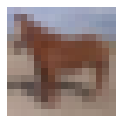

In [14]:
oneshot = images[1].permute(1, 2, 0).numpy()
plt.figure(figsize=(2, 2))
plt.imshow(oneshot)
plt.axis("off")
plt.show()

----------------------------------------------------------------------------------------------------------

#### 🔎 4.3.2 같은 클래스 별로 폴더를 정리

- 데이터가 같은 클래스 별로 미리 폴더를 정리한 경우
    - ImageFolder 하나로 개인 데이터를 사용 할 수 있다.
    - 라벨링 필요 없고, 폴더 별로 자동으로 라벨링한다.

In [8]:
transf = tr.Compose([tr.Resize(128), tr.ToTensor()])
trainset = torchvision.datasets.ImageFolder
trainloader = DataLoader(trainset, batch_size=1, shuffle=False)

----------------------------------------------------------------------------------------------------------

#### 🔎 4.3.3 정리되지 않은 커스텀 데이터 불러오기

- `ImageFolder`를 이용하면 매우 간단하게 이미지 데이터를 사용할 수 있지만 여러 가지 이유로 사용 불가한 경우
    - 라벨 별로 폴더 정리가 되어 있으면 좋겠지만 그렇지 않은 경우가 많다.
    - 정리를 하고 싶지만 다른 작업들과 공유된 데이터인 경우 폴더를 함부로 정리할 수 없다.
    - 이미지 데이터라도 이미지가 아닌 텍스트, 리스트, 배열 등의 다른 형태로 저장되어 있는 경우도 있다.

- `class 클래스명(Dataset)` : Dataset을 상속받아 DataLoader에서 배치 단위로 불러올 수 있게 한다.
    - `__init__(self)` : 데이터 세팅에 필요한 것들을 미리 정의
    - `__getitem__(self, index)` : DataLoader를 통해 샘플이 요청되면 이 함수를 통해 인덱스에 해당하는 샘플을 찾아 준다.
    - `__len__(self)` : 크기를 반환

In [ ]:
from torch.utils.data import Dataset

class 클래스명(Dataset) :
    def __init__(self) :
    ...
    def __getitem__(self, index) :
    ...
    def __len__(self) :
    ...

##### **💡 커스텀 데이터 세트 예시** (넘파이 -> 텐서)
    - 32x32 크기인 RGB 컬러 이미지 100장과 그에 대한 라벨이 되어 있고 넘파이 배열로 정리되어 있다고 가정

In [10]:
train_images = np.random.randint(256, size=(100, 32, 32, 3))/255
train_labels = np.random.randint(2, size=(100, 1))

class TensorData(Dataset) :
    # 데이터를 받아 텐서로 변환
    def __init__(self, x_data, y_data) :
        # 파이토치에 있는 함수(텐서로 바꿔주는 함수 사용)
        self.x_data = torch.FloatTensor(x_data)
        # 원래 이미지가 (100, 32, 32, 3)이므로 (100, 3, 32, 32)
        self.x_data = self.x_data.permute(0, 3, 1, 2)
        self.y_data = torch.LongTensor(y_data)
        # 입력 데이터의 개수에 대한 변수 
        self.len = self.y_data.shape[0]
        
    def __getitem__(self, index) :
        # 뽑아낼 데이터에 대해서 인덱스 처리
        return self.x_data[index], self.y_data[index]
    
    def __len__(self) :
        # 미리 선언한 self.len 반환
        return self.len

In [11]:
train_data = TensorData(train_images, train_labels)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)

----------------------------------------------------------------------------------------------------------

#### 🔎 4.3.4 커스텀 데이터와 커스텀 전처리 사용하기

- 파이토치는 전처리 함수들을 제공하여 매우 편리하게 사용 가능
    - 단, 이미지의 경우 PIL-Image, Tensor 타입일 때 사용 가능
    - 제공하지 않는 기능에 대해서는 직접 구현 필요
- **전처리 클래스 2개를 직접 정의하고 사용**

In [66]:
# 32x32 컬러 이미지와 라벨이 각각 100장이 있다고 가정하다.
# glob -> PIL, openCV ..
train_images = np.random.randint(256,size=(100,32,32,3))/255 # (이미지 수)x(너비)x(높이)x(채널 수)
train_labels = np.random.randint(2,size=(100,1)) # 라벨 수

- `__call__`
    - 전처리는 MyDataset 클래스의 sample을 불러와 작업하기 때문에 `__call__` 함수 사용
    - 입력값을 하나씩 불러오기 때문에 `permute(0, 3, 1, 2)`가 아님
    - 함수를 호출하는 것처럼, 클래스의 객체도 호출하게 만들어주는 메서드
    - `__init__`은 인스턴스 초기화, `__call__`은 인스턴스가 호출되었을 때 실행
- `ToTensor :`는 입력 데이터를 텐서 데이터로 변환해 주고 학습에 맞는 크기로 변환
- `torch.FloatTensor`, `torch.LongTensor`를 이용해 텐서로 변환

- `CutOut` 
    - 전처리 클래스 정의
    - 이미지 내부에 무작위로 사각형 영역을 선택하여 0으로 만드는 데이터 증식 방법


In [67]:
# 전처리 기술을 직접 만들어 보자.
# 이 때 위 기본 양식과 같이 사용하기 위해 call 함수를 사용한다.
# def __call__ 내의 원하는 전처리 작업을 프로그래밍 할 수 있다.

# 1. 텐서 변환
class ToTensor:
    def __call__(self, sample):
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs) # 텐서로 변환
        inputs = inputs.permute(2,0,1) # 크기 변환
        return inputs, torch.LongTensor(labels) # 텐서로 변환

In [72]:
# 2. CutOut    
class CutOut:
    """
    ToTensor와 다르게 외부에서 CutOut 발생 비율을 받기 위해 __init__ 함수를 사용하여 ratio 받는다.
    기본 ratio는 0.5로 세팅하면 불러온 이미지에 대해 50% 확률로 CutOut
    """
    def __init__(self, ratio=.5):
        self.ratio = int(1/ratio)
           
     # __call__함수에서는 sample 받는다.
    def __call__(self, sample):
        inputs, labels = sample
        # active는 정수를 뽑는다.
        # 50%일 경우 0과 1 중 하나를 뽑게 되고 0이면 CutOut 발현하고 0이 아니면 원본 그대로 내보낸다.
        active = int(np.random.randint(0, self.ratio, 1))
        
        if active == 0:
             # inputs의 크기는 (채널수, 너비, 높이)이므로 출력 개수를 맞춰야 하므로 변수 3개 선언(채널 필요 X)
            _, w, h = inputs.size()
            min_len = min(w, h)
            # CutOut의 크기를 길이의 최솟값의 25%로 설정
            box_size = int(min_len//4)
             # idx를 통해 CutOut 박스의 좌측 상단 꼭짓점의 위치 지정
            idx = int(np.random.randint(0, min_len-box_size, 1))
            # 해당 정사각형 영역의 값을 0으로 대체 
            inputs[:,idx:idx+box_size,idx:idx+box_size] = 0
        
        return inputs, labels


# ..... 
# 추가로 계속 원하는 전처리를 정의하자.
# ..... 

- 4.3.3의 MyDataset에서 전처리 추가
- `__init__` 의 입력값에 transform = None 추가
    - 입력값을 =으로 표현하여 기본값을 지정
    - 만약 transform이 None이 아니라면 __getitem__에서 sample을 반환하기 전에 전처리
    - None이면 텐서 변환은 기본적으로 하도록 구성

In [73]:
# 3.3에서 사용한 양식을 그대로 사용하되 전처리 작업을 할 수 있도록 transform을 추가한다. 
class MyDataset(Dataset):
    
    def __init__(self, x_data, y_data, transform=None):
        
        self.x_data = x_data # 넘파이 배열이 들어온다.
        self.y_data = y_data # 넘파이 배열이 들어온다.
        self.transform = transform
        self.len = len(y_data)
         # 직접 텐서 바꾸는 클래스 사용
        self.tensor = ToTensor()
    
    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]
        
        if self.transform:
            sample = self.transform(sample) #self.transform이 None이 아니라면 전처리를 작업한다.
        else:
            sample = self.tensor(sample)
        
        return sample 
    
    def __len__(self):
        return self.len      

In [74]:
#trans = tr.Compose([ToTensor(),LinearTensor(2,5)]) # 텐서 변환 후 선형식 2x+5 연산
trans = tr.Compose([ToTensor(),CutOut()]) 
dataset1 = MyDataset(train_images,train_labels, transform=trans)
train_loader1 = DataLoader(dataset1, batch_size=10, shuffle=True)

# ToTensor()와 tr.ToTensor()의 차이
# 앞 서 사용한 tr.ToTensor()는 import torchvision.transforms as tr를 이용한 파이토치 메소드를 이용한 것이고
# ToTensor()는 위에서 정의 된 메소드를 사용한 것이다.

In [75]:
images1, labels1 = iter(train_loader1).next()
print(images1.size()) # 배치 및 이미지 크기 확인

torch.Size([10, 3, 32, 32])


In [78]:
import torchvision
def imshow(img):
    plt.figure(figsize=(10,100))
    plt.imshow(img.permute(1,2,0).numpy())
    plt.show()

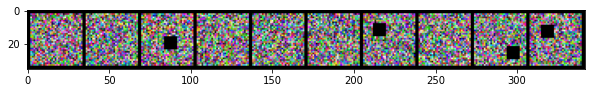

In [79]:
imshow(torchvision.utils.make_grid(images1,nrow=10))

----------------------------------------------------------------------------------------------------------

#### 🔎 4.3.5 커스텀 데이터와 파이토치 제공 전처리 사용하기 

- 텐서 변환과 같은 전처리는 파이토치에서 제공하는 전처리를 사용하면 편리
- 하지만 파이토치에서 제공되느 많은 전처리는 PILImage 타입일 경우 사용 가능
- 따라서 기능은 있는데 데이터 타입이 다른 경우 PILImage 타입으로 변환하여 제공된 전처리 사용 가능

In [84]:
# torchvision.transforms에서 제공하는 전처리 기술을 사용한다.
# torchvision.transforms은 입력 이미지가 일반적으로 PILImage 타입이나 텐서일 경우에 동작한다.
# 현재 데이터는 넘파이 배열이다. 따라서 텐서 변환 후 tr.ToPILImage()을 이용하여 PILImage 타입으로 만들어 준다.
# __call__을 이용한 기본 구조는 동일하다.

class MyTransform:
    
    def __call__(self, sample):
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs)
        inputs = inputs.permute(2,0,1)
        labels = torch.FloatTensor(labels)

        transf = tr.Compose([tr.ToPILImage(), tr.Resize(128), tr.ToTensor()])
        final_output = transf(inputs)      
        
        return final_output, labels  

In [85]:
# MyDataset은 4.3.4과 동일하게 사용하고 전처리에 MyTransform() 넣어준다.
dataset2 = MyDataset(train_images, train_labels, transform = MyTransform())
train_loader2 = DataLoader(dataset2, batch_size=10, shuffle=True)

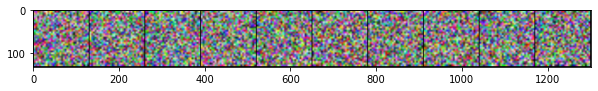

torch.Size([10, 3, 128, 128])


In [86]:
images2, labels2 = iter(train_loader2).next()
imshow(torchvision.utils.make_grid(images2,nrow=10))
print(images2.size()) # 배치 및 이미지 크기 확인

----------------------------------------------------------------------------------------------------------

#### 🔎 4.3.6 커스텀 전처리와 파이토치에서 제공하는 전처리 함께 사용하기

- 4.3.4에서 사용한 CutOut과 달리 이번 CutOut은 라벨은 받지 않고 이미지를 받아 처리
    - Compose 내부에 있는 제공된 전처리 이미지만 받아서 처리하기 때문에 그 양식을 맞춰 주어야 하기 때문
    - CutOut은 텐서나 넘파이 배열 타입 모두 작동을 하게 만들었지만 PILImage는 오류
    - 따라서 tr.ToTensor() 뒤에 CutOut 배치

In [90]:
class CutOut:
    
    def __init__(self, ratio=.5):
        self.ratio = int(1/ratio)
           
    def __call__(self, inputs):

        active = int(np.random.randint(0, self.ratio, 1))
        
        if active == 0:
            _, w, h = inputs.size()
            min_len = min(w, h)
            box_size = int(min_len//4)
            idx = int(np.random.randint(0, min_len-box_size, 1))
            inputs[:,idx:idx+box_size,idx:idx+box_size] = 0
        
        return inputs

In [91]:
# 3.3에서 사용한 양식을 그대로 사용하되 전처리 작업을 할 수 있도록 transform을 추가한다. 
class MyDataset(Dataset):
    
    def __init__(self, x_data, y_data, transform=None):
        
        self.x_data = x_data # 넘파이 배열이 들어온다.
        self.y_data = y_data # 넘파이 배열이 들어온다.
        self.transform = transform
        self.len = len(y_data)
        self.tensor = ToTensor()
    
    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]
        
        if self.transform:
            sample = self.transform(sample) #self.transform이 None이 아니라면 전처리를 작업한다.
        else:
            sample = self.tensor(sample)
        
        return sample
    
    def __len__(self):
        return self.len       

In [93]:
class MyTransform:
    
    def __call__(self, sample):
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs)
        inputs = inputs.permute(2,0,1)
        labels = torch.FloatTensor(labels)

        transf = tr.Compose([tr.ToPILImage(), tr.Resize(128), tr.ToTensor(), CutOut()])
        final_output = transf(inputs)      
        
        return final_output, labels  

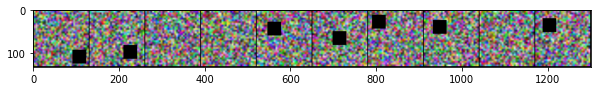

torch.Size([10, 3, 128, 128])


In [100]:
# 전처리 적용
dataset3 = MyDataset(train_images,train_labels, transform=MyTransform())
train_loader3 = DataLoader(dataset3, batch_size=10, shuffle=True)

images3, labels3 = iter(train_loader3).next()
imshow(torchvision.utils.make_grid(images3,nrow=10))
print(images3.size()) # 배치 및 이미지 크기 확인

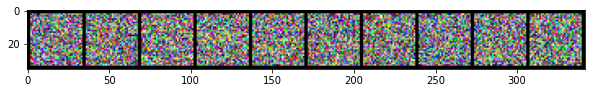

torch.Size([10, 3, 32, 32])


In [101]:
# 전처리 미적용
dataset3 = MyDataset(train_images,train_labels)
train_loader3 = DataLoader(dataset3, batch_size=10, shuffle=True)

images3, labels3 = iter(train_loader3).next()
imshow(torchvision.utils.make_grid(images3,nrow=10))
print(images3.size()) # 배치 및 이미지 크기 확인

In [102]:
# CIFAR 데이터와 커스텀 전처리 사용
transf = tr.Compose([tr.Resize(128), tr.ToTensor(), CutOut()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)

Files already downloaded and verified


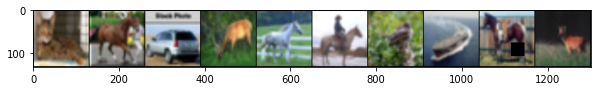

torch.Size([10, 3, 128, 128])


In [103]:
trainloader = DataLoader(trainset, batch_size=10, shuffle=True)
images, labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(images,nrow=10))
print(images.size()) # 배치 및 이미지 크기 확인